In [6]:
# !pip install face_recognition

In [76]:
import os
import face_recognition
import numpy as np

In [111]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
dataset_path_encodings_map = {}
dataset_path_locations_map = {}
images_paths=["/kaggle/input/google-photos/412742735_918289786575510_417416422359763791_n.jpeg"]
faces_count=0
for image_path in images_paths:
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)
    dataset_path_encodings_map[image_path] = [encoding.tolist() for encoding in face_encodings]
    dataset_path_locations_map[image_path] = [loc for loc in face_locations]
    faces_count+=len(face_encodings)

print(f"Processed {len(images_paths)} images: {faces_count} faces detected.")
with open("encodings_map.json", "w") as f:
    json.dump(dataset_path_encodings_map, f)
    
with open("locations_map.json", "w") as f:
    json.dump(dataset_path_locations_map, f)

print("Saved embeddings and locations to JSON!")

Processed 1 images: 6 faces detected.
Saved embeddings and locations to JSON!


In [107]:
input_search_images=["/kaggle/input/google-photos/Capture dcran 2025-09-17 155748.png",
      "/kaggle/input/google-photos/Capture dcran 2025-09-17 155834.png",
      "/kaggle/input/google-photos/IMG_20240728_183350.jpg"]

input_search_images_encoding_map={}
for image_path in input_search_images:
    
    image_i = face_recognition.load_image_file(image_path)

    face_locations_i = face_recognition.face_locations(image_i)
    face_encodings = face_recognition.face_encodings(image_i, face_locations_i)

    input_search_images_encoding_map[image_path] = face_encodings[0]

    print(f"Processed {image_path}: {len(face_encodings)} face(s) detected.")

Processed /kaggle/input/google-photos/Capture dcran 2025-09-17 155834.png: 1 face(s) detected.
Processed /kaggle/input/google-photos/IMG_20240728_183350.jpg: 1 face(s) detected.


In [ ]:
import random
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))


In [109]:
SIMILARITY_THRESHOLD = 0.95
# pil_image_copy = Image.fromarray(image)
# draw = ImageDraw.Draw(pil_image_copy)

similar_images={}
for img_path in input_search_images_encoding_map:
    color=random_color()
    img_emb = np.array(input_search_images_encoding_map[img_path])
    img_emb_norm = img_emb / np.linalg.norm(img_emb)

    for ref_image_path in dataset_path_encodings_map:
        if ref_image_path not in similar_images:
            similar_images[ref_image_path]=[] 
        for i, embedding in enumerate(dataset_path_encodings_map[ref_image_path]):
            embedding = np.array(embedding)
            embedding_norm = embedding / np.linalg.norm(embedding)

            cos_sim = np.dot(img_emb_norm, embedding_norm)
            if cos_sim >= SIMILARITY_THRESHOLD:
                similar_images[ref_image_path].append([dataset_path_locations_map[ref_image_path][i], color])
                # print(f"{img_path} matches {ref_image_path} with similarity {cos_sim:.2f}")
                # top, right, bottom, left = dataset_path_locations_map[img_path][i]
                # draw.rectangle([left, top, right, bottom], outline="green", width=3)


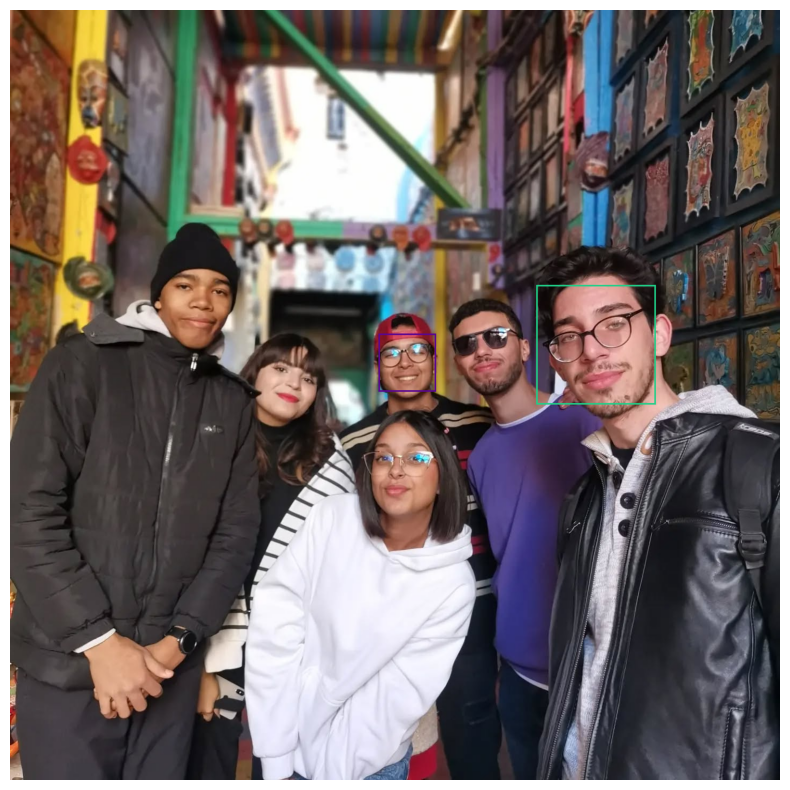

In [110]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def draw_faces_with_colors(similar_images):
    image_path = list(similar_images.keys())[0]
    rectangles = similar_images[image_path]

    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    for rect, color in rectangles:
        top, right, bottom, left = rect
        draw.rectangle([left, top, right, bottom], outline=color, width=3)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


draw_faces_with_colors(similar_images)
